# Overlaps between different motif clusters

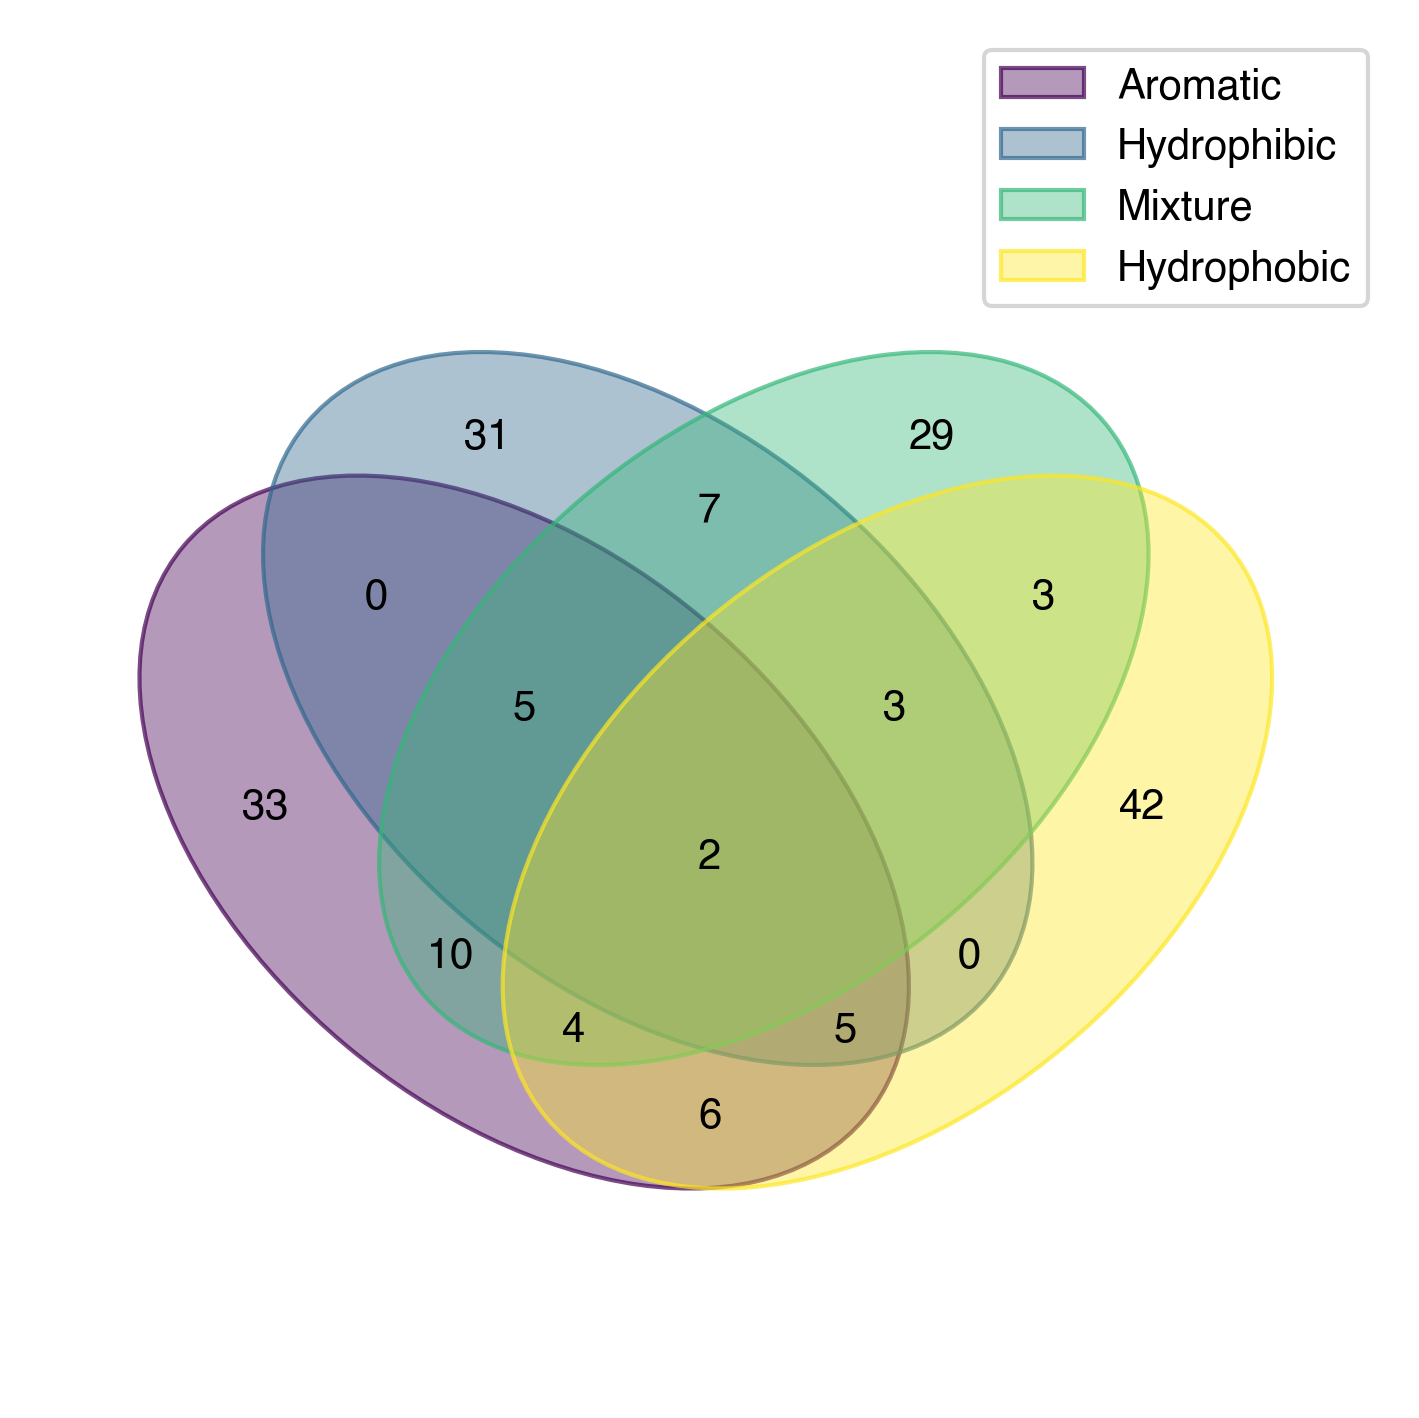

In [2]:
import json
from venn import venn
import matplotlib.pyplot as plt

f = open('Cluster_file','r').read()

clst_dic = json.loads(f)

fg_0 = []; fg_1 = []; fg_2 = []; fg_3 = []

for motif in clst_dic['0']:
    fg_0.append(motif[0:motif.index('_')])

for motif in clst_dic['1']:
    fg_1.append(motif[0:motif.index('_')])

for motif in clst_dic['2']:
    fg_2.append(motif[0:motif.index('_')])

for motif in clst_dic['3']:
    fg_3.append(motif[0:motif.index('_')]) 
    
    
fg_dic = {'Aromatic':set(fg_0),'Hydrophibic':set(fg_1),'Mixture':set(fg_2),'Hydrophobic':set(fg_3)}

plt.figure(figsize=(6,6),dpi=300)
plt.rcParams["font.family"] = "Helvetica"
ax = plt.gca()
venn(fg_dic, fontsize=10, legend_loc="upper right",ax=ax)
plt.show()

# Distribution of four motif types

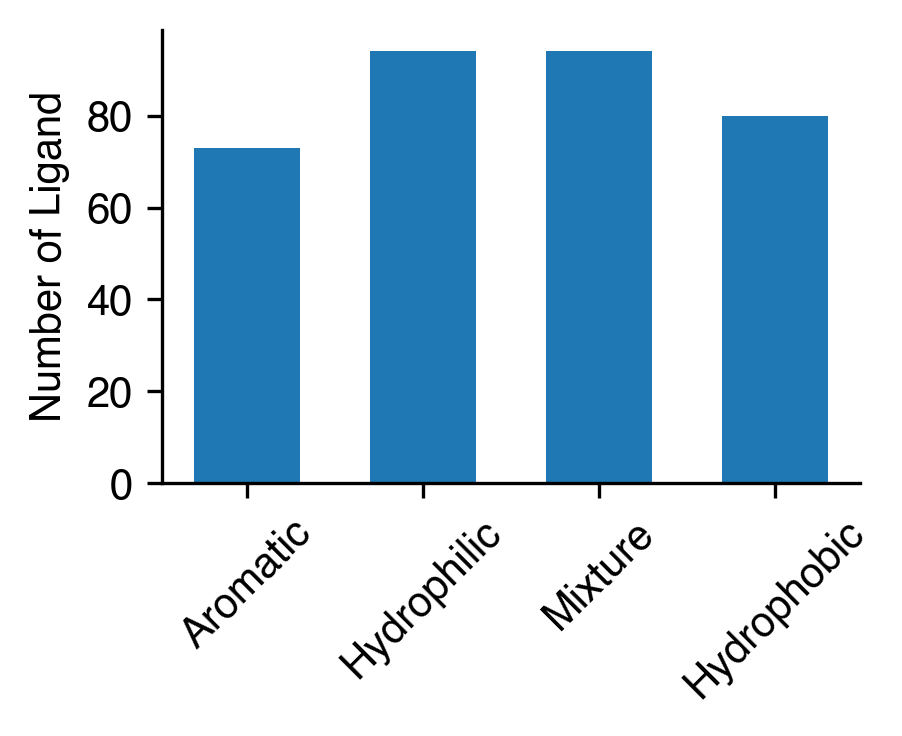

In [3]:
lig_0 = []; lig_1 = []; lig_2 = []; lig_3 = []

for motif in clst_dic['0']:
    lig_0.append(motif[-12:-9])

for motif in clst_dic['1']:
    lig_1.append(motif[-12:-9])

for motif in clst_dic['2']:
    lig_2.append(motif[-12:-9])

for motif in clst_dic['3']:
    lig_3.append(motif[-12:-9]) 
    

plt.figure(figsize=(3,2),dpi=300)

plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = "Helvetica"
plt.ylabel('Number of Ligand',fontsize=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.bar([1,2,3,4],[len(set(lig_0)),len(set(lig_1)),len(set(lig_2)),len(set(lig_3))],width=0.6,
        tick_label=['Aromatic','Hydrophilic','Mixture','Hydrophobic'])

plt.xticks(rotation=45, fontsize=10)

plt.show()

# The ligands involved in different motif combinations

In [6]:
import os

lig_com_dic = {}

lig_ls = os.listdir('../Motif_all/statistic/')

for lig in lig_ls:
    com = []
    if lig in lig_0:
        com.append(0)
    if lig in lig_1:
        com.append(1)
    if lig in lig_2:
        com.append(2)
    if lig in lig_3:
        com.append(3)
    #print(tuple(com))
    if tuple(com) in lig_com_dic:
        lig_com_dic[tuple(com)].append(lig)
    else:
        lig_com_dic[tuple(com)] = [lig]



{(1, 2): ['F6P', '13P', 'FBP', '5RP', 'ICT', 'ASN', 'ASP', 'BG6', 'MLT', 'BU3', 'CIT', 'NXL', 'DAN', 'OXM', 'PDO', 'PGH', 'PLP', 'FLC', 'G1P', 'G3P', 'G6P', 'SEP', 'SIA', 'UTP'], (0, 1): ['1PS', 'A3P', 'LBT', 'C5P', 'DCT', 'DGT', 'DST', 'G3H', 'TDP', 'TTP', 'TYD'], (1, 3): ['FAD', 'FDA', 'GDP', '5GP', 'ACD', 'GNP', 'ACP', 'GPP', 'GSP', 'GTP', 'ADP', 'AGS', 'AMP', 'ANP', 'AP5', 'APC', 'ATP', 'MTA', 'C2E', 'MTX', 'CAA', 'NAI', 'NAP', 'CDP', 'NDP', 'COA', 'COM', 'PGA', 'DTP', 'PLR', 'PMP', 'U5P'], (0, 1, 3): ['2BA', 'ACO', 'GTX', 'C2F', 'DUP', 'FPP', 'FPS'], (): ['2HP', 'GCU', 'GLA', 'GLC', 'ADA', 'ADE', 'GUN', 'AHR', 'HPA', 'IFM', 'IMD', 'INS', 'IPA', 'IPH', 'ASC', 'BDP', 'MAN', 'BGC', 'BMA', 'MMA', 'NCA', 'CLR', 'NGA', 'NIO', 'NOJ', 'DAL', 'ORN', 'DMS', 'PEG', 'DPO', 'EDO', 'EOH', 'FMN', 'PO3', 'FMT', 'PO4', 'POL', 'POP', 'PPV', 'FRU', 'FUC', 'PYR', 'FUL', 'RAM', 'RIB', 'GAL', 'GCS', 'SKM', 'SLB', 'SO4', 'TMO', 'URA', 'XYL', 'XYP', 'XYS'], (1,): ['3PG', '4IP', 'MLI', 'CTP', 'PEP', 'PRP'

# Distribution of different binding modes

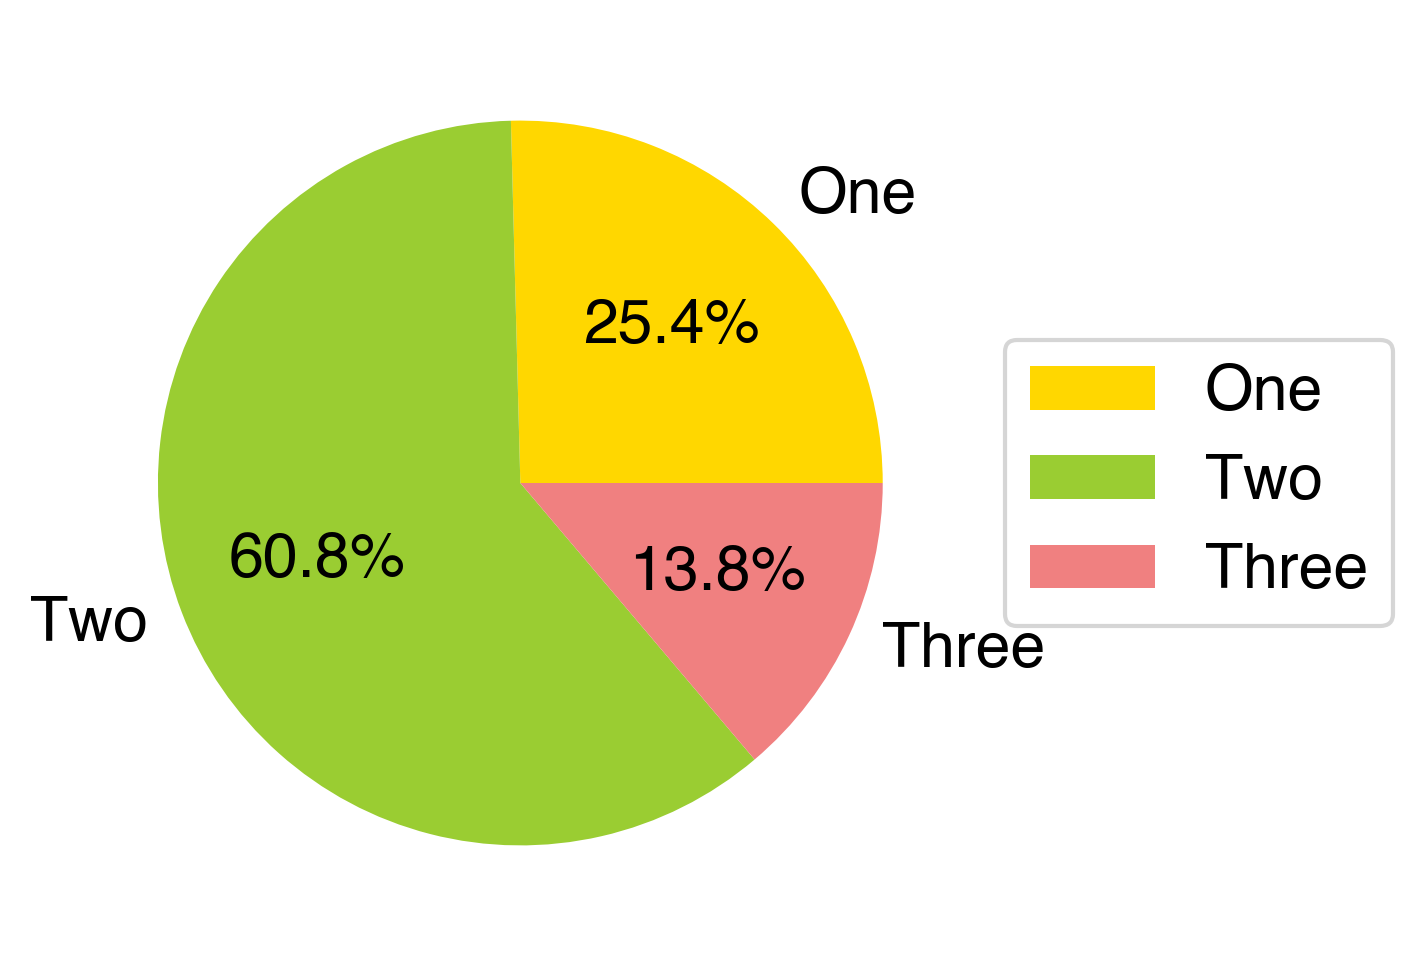

In [7]:
sizes = [len(lig_com_dic[(0,)])+len(lig_com_dic[(1,)])+len(lig_com_dic[(2,)])+len(lig_com_dic[(3,)]),
        len(lig_com_dic[(0,1)])+len(lig_com_dic[(0,2)])+len(lig_com_dic[(0,3)])+len(lig_com_dic[(1,2)])+len(lig_com_dic[(1,3)])+len(lig_com_dic[(2,3)]),
        len(lig_com_dic[(0,1,2)])+len(lig_com_dic[(0,1,3)])+len(lig_com_dic[(0,2,3)])+len(lig_com_dic[(1,2,3)])]

labels = ['One','Two','Three']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightblue','cyan', 'silver', 'white', 'yellow']

#sizes = at_df.mean(axis=0)[0:-1]

plt.figure(figsize=(4,4),dpi=300)

plt.rcParams["font.size"] = 15
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors[0:len(sizes)])

plt.legend(loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# Distribution of different motif combinaiton

In [9]:
g1_ls = [len(lig_com_dic[(0,)]),len(lig_com_dic[(1,)]),len(lig_com_dic[(2,)]),len(lig_com_dic[(3,)])]

g2_ls = [len(lig_com_dic[(0,1)]),len(lig_com_dic[(0,2)]),len(lig_com_dic[(0,3)]),
         len(lig_com_dic[(1,2)]),len(lig_com_dic[(1,3)]),len(lig_com_dic[(2,3)])]

g3_ls = [len(lig_com_dic[(0,1,2)]),len(lig_com_dic[(0,1,3)]),len(lig_com_dic[(0,2,3)]),len(lig_com_dic[(1,2,3)])]

print(g1_ls)
print(g2_ls)
print(g3_ls)

[12, 8, 14, 12]
[11, 25, 5, 24, 32, 13]
[7, 7, 6, 5]


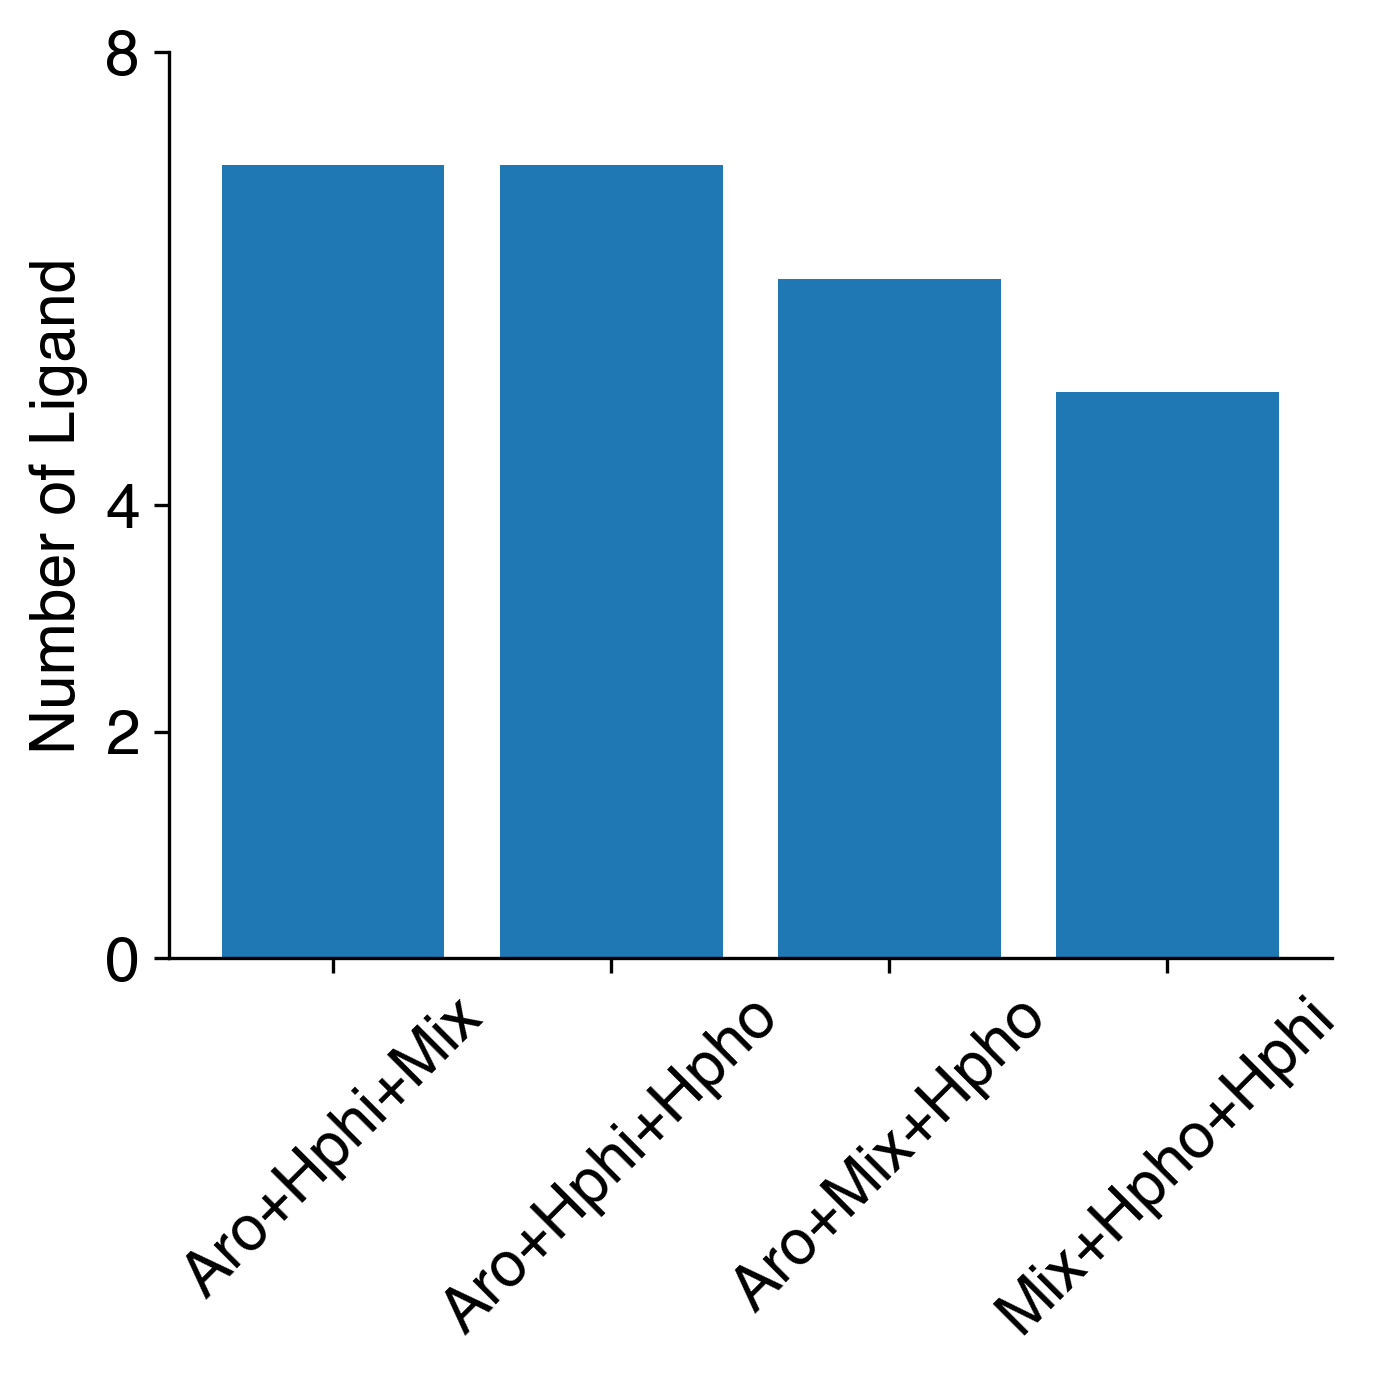

In [10]:
plt.figure(figsize=(5,4),dpi=300)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "Helvetica"

labels = ['Aro+Hphi+Mix','Aro+Hphi+Hpho','Aro+Mix+Hpho','Mix+Hpho+Hphi']
y_cor = range(1,5)

plt.bar(y_cor,sorted(g3_ls,reverse=True),width=0.8, tick_label=labels)
plt.ylabel('Number of Ligand')
plt.xticks(rotation=45)
plt.yticks([0,2,4,8])

plt.show()

# Affinity comparison in different binding mode

In [37]:
import pandas as pd
import ast

aff_dic = {}
df_a = pd.read_excel('affi2.xlsx')
df_a.columns=['Ligand Name','Affinity']

for i in range(df_a.shape[0]):
    lig = df_a['Ligand Name'][i]
    aff_ls = ast.literal_eval(df_a['Affinity'][i])
    aff_dic[lig] = aff_ls
    
    
af_0 = []; af_1 = []; af_2 = []; af_3 = []
af_4 = []; af_5 = []; af_6 = []; af_7 = []
af_8 = []; af_9 = []; af_10 = []; af_11 = []; af_12 = []; af_13 = []

for lig in lig_com_dic[(0,)]:
    if lig in aff_dic:
        af_0 += aff_dic[lig]
    
for lig in lig_com_dic[(1,)]:
    if lig in aff_dic:
        af_1 += aff_dic[lig]
    
for lig in lig_com_dic[(2,)]:
    if lig in aff_dic:
        af_2 += aff_dic[lig]

for lig in lig_com_dic[(3,)]:
    if lig in aff_dic:
        af_3 += aff_dic[lig]
        
for lig in lig_com_dic[(0,1)]:
    if lig in aff_dic:
        af_4 += aff_dic[lig]
        
for lig in lig_com_dic[(0,2)]:
    if lig in aff_dic:
        af_5 += aff_dic[lig]
        
for lig in lig_com_dic[(0,3)]:
    if lig in aff_dic:
        af_6 += aff_dic[lig]
        
for lig in lig_com_dic[(1,2)]:
    if lig in aff_dic:
        af_7 += aff_dic[lig]
        
for lig in lig_com_dic[(1,3)]:
    if lig in aff_dic:
        af_8 += aff_dic[lig]
        
for lig in lig_com_dic[(2,3)]:
    if lig in aff_dic:
        af_9 += aff_dic[lig]
        
for lig in lig_com_dic[(0,1,2)]:
    if lig in aff_dic:
        af_10 += aff_dic[lig]
        
for lig in lig_com_dic[(0,1,3)]:
    if lig in aff_dic:
        af_11 += aff_dic[lig]
        
for lig in lig_com_dic[(0,2,3)]:
    if lig in aff_dic:
        af_12 += aff_dic[lig]
        
for lig in lig_com_dic[(1,2,3)]:
    if lig in aff_dic:
        af_13 += aff_dic[lig]

# One-type-binding mode comparison

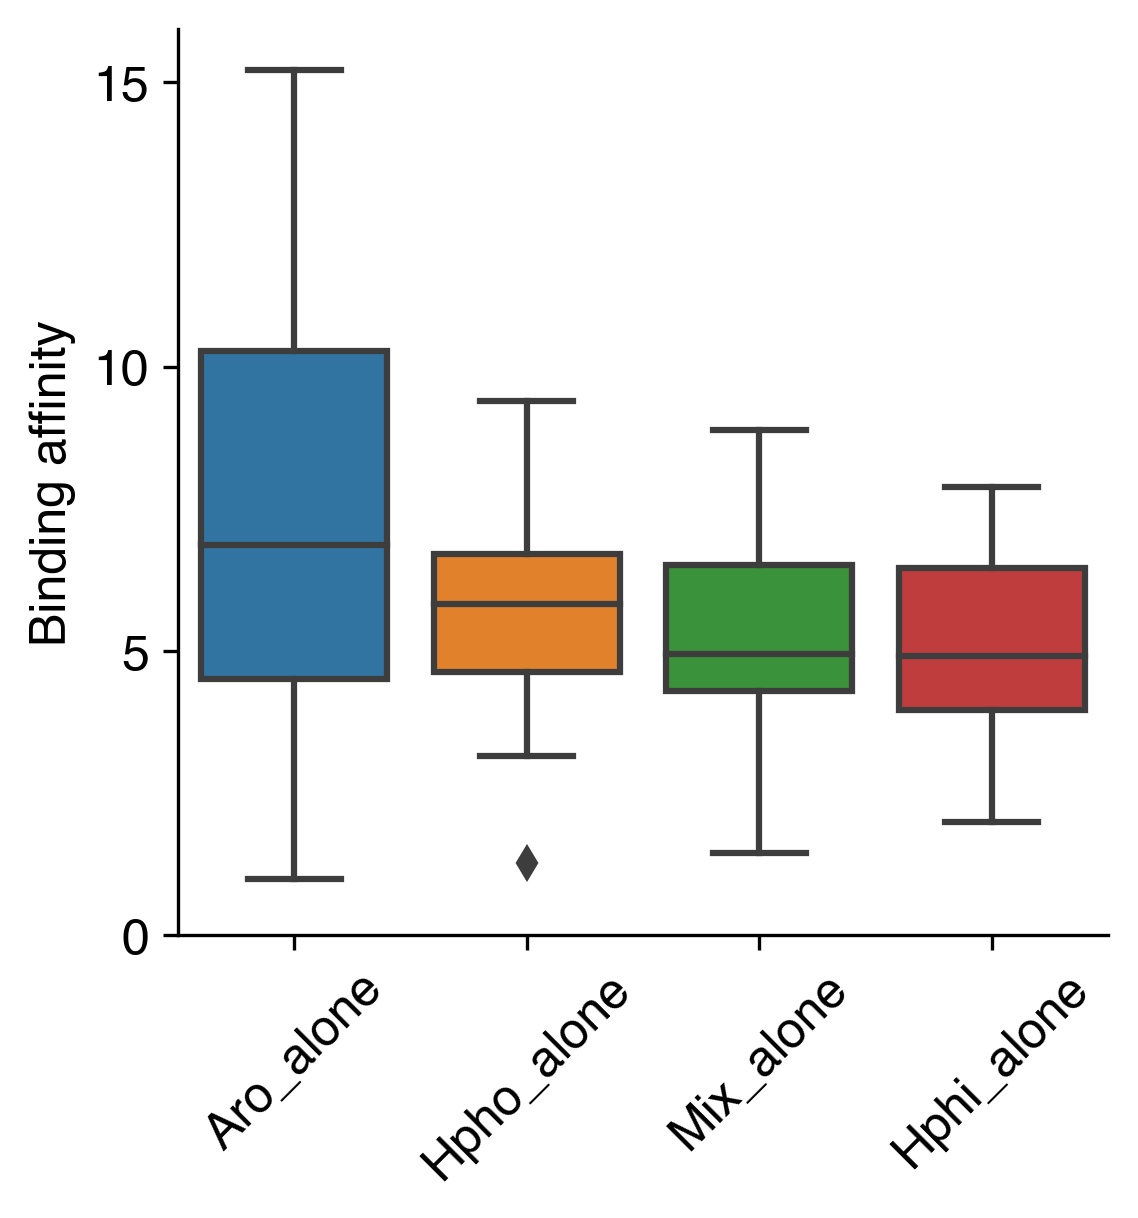

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame([af_0,af_3,af_2,af_1],index=['Aro_alone','Hpho_alone','Mix_alone','Hphi_alone']).T


plt.figure(figsize=(4,4),dpi=300)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams["font.size"] = 12
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.boxplot(data=data) 
plt.xticks(rotation=45)
plt.yticks([0,5,10,15])
plt.ylabel('Binding affinity')
plt.show()

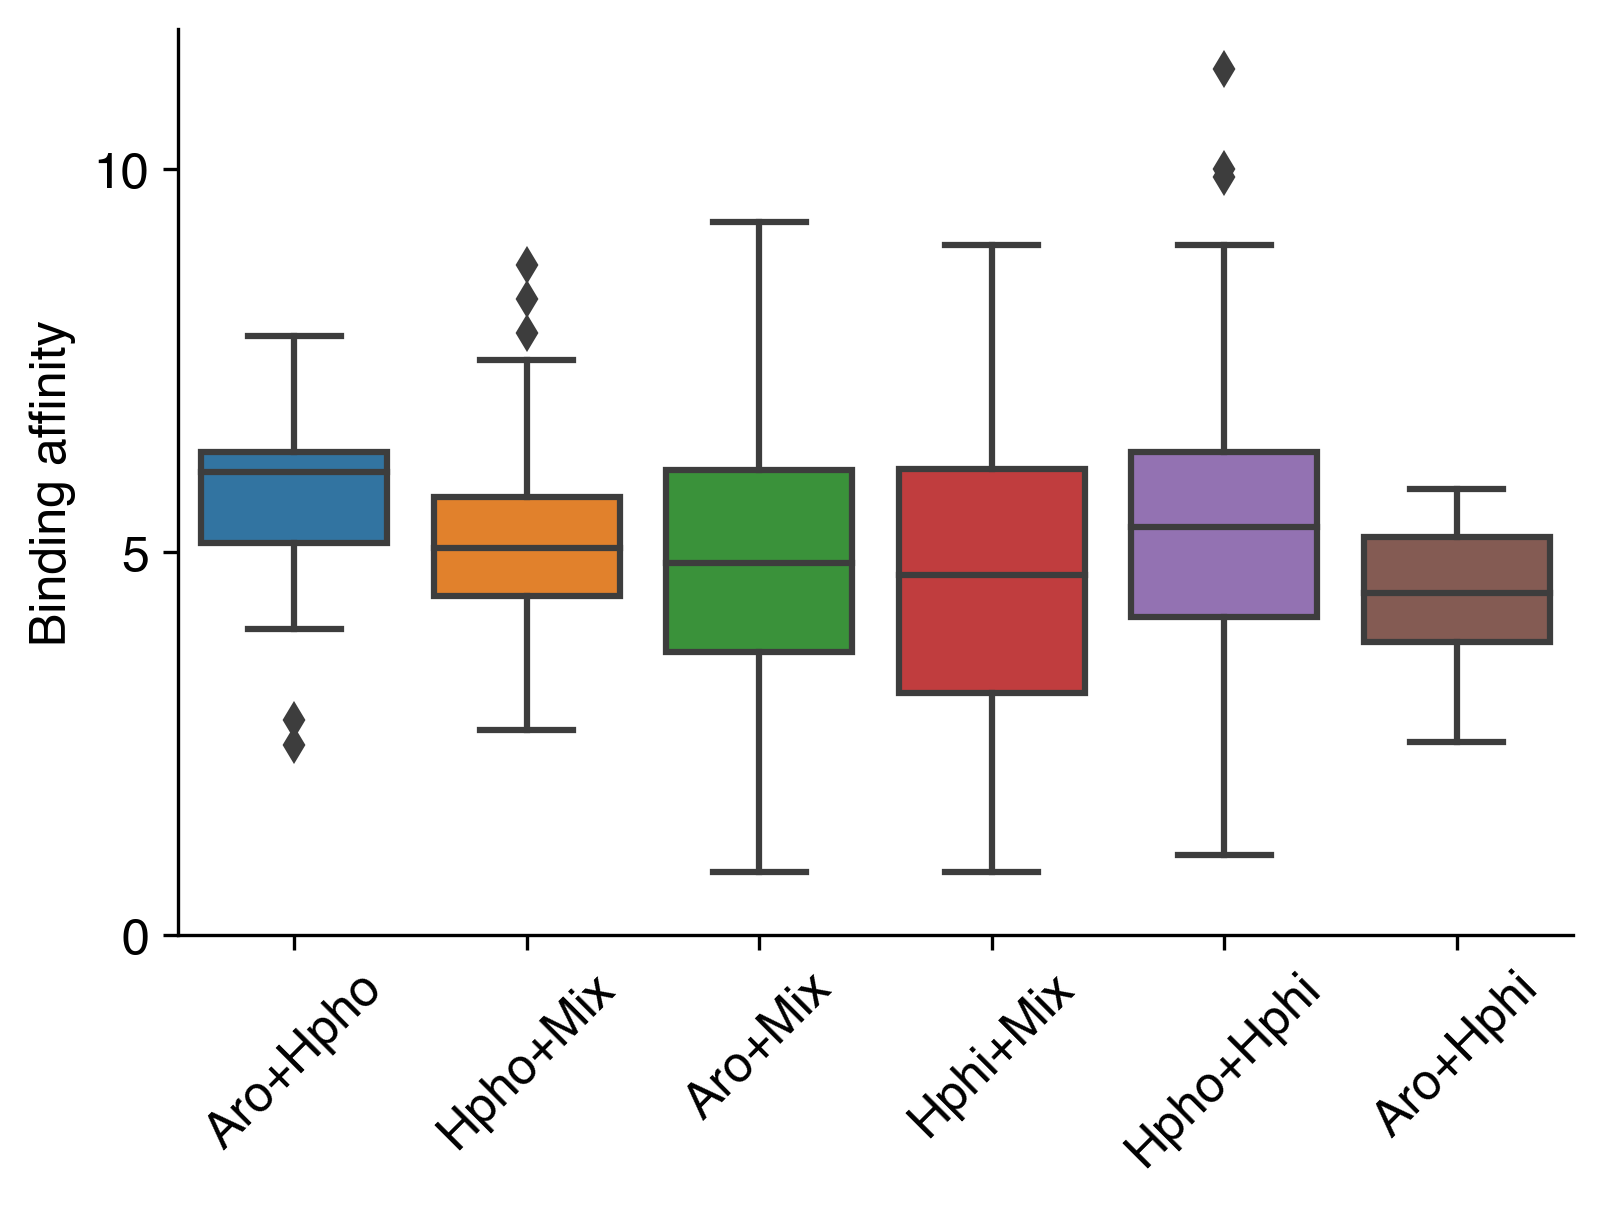

In [38]:
import random


data = pd.DataFrame([af_6,af_9,af_5,af_7,af_8,af_4],index=['Aro+Hpho','Hpho+Mix','Aro+Mix','Hphi+Mix','Hpho+Hphi','Aro+Hphi']).T

plt.figure(figsize=(6,4),dpi=300)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams["font.size"] = 12
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.boxplot(data=data)
#sns.swarmplot(data=data, color=".25")
plt.xticks(rotation=45)
plt.yticks([0,5,10])
plt.ylabel('Binding affinity')
plt.show()

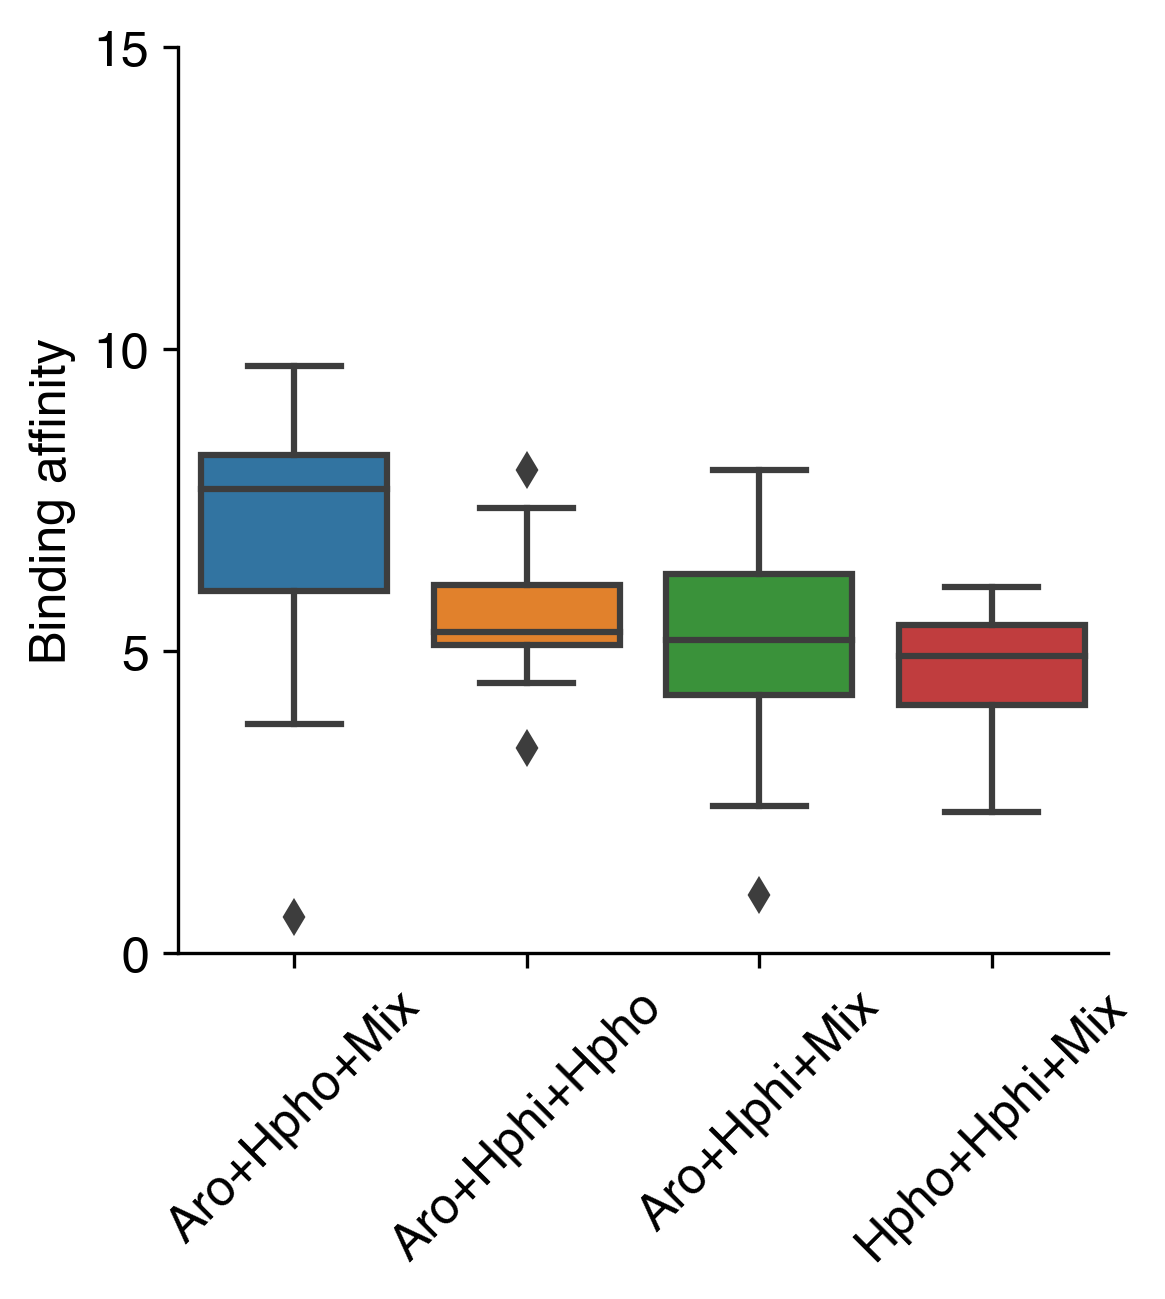

In [39]:
data = pd.DataFrame([af_12,af_11,af_10,af_13],index=['Aro+Hpho+Mix','Aro+Hphi+Hpho','Aro+Hphi+Mix','Hpho+Hphi+Mix']).T


plt.figure(figsize=(4,4),dpi=300)
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams["font.size"] = 12
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.boxplot(data=data)
#sns.swarmplot(data=data, color=".25")
plt.xticks(rotation=45)
plt.yticks([0,5,10,15])
plt.ylabel('Binding affinity')
plt.show()